In [0]:
##Getting Data from Quandl

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 

# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'cVeaxjEdNDHrwcx1QXc3'
selected = ['AAPL','AMZN','FB','GOOGL','NFLX']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2015-1-1' }, paginate=True)


#Display top 3 and bottom 3 rows of the table
with pd.option_context('display.max_rows',6):
    print(data)
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 


           date ticker   adj_close
None                              
0    2018-03-27   NFLX  300.690000
1    2018-03-26   NFLX  320.350000
2    2018-03-23   NFLX  300.940000
...         ...    ...         ...
4060 2015-01-06   AAPL  100.947444
4061 2015-01-05   AAPL  100.937944
4062 2015-01-02   AAPL  103.863957

[4063 rows x 3 columns]


In [0]:
#- - - - - - - - - - - - - - - - - - - - - - - - - - - #

# create a new dataframe with 'date' column as index

new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')


#Display top 5 and bottom 5 rows of the clean data
with pd.option_context('display.max_rows',6):
    print(clean_data)

    
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -#     

             adj_close                                      
ticker            AAPL     AMZN      FB    GOOGL        NFLX
date                                                        
2015-01-02  103.863957   308.52   78.45   529.55   49.848571
2015-01-05  100.937944   302.19   77.19   519.46   47.311429
2015-01-06  100.947444   295.29   76.15   506.64   46.501429
...                ...      ...     ...      ...         ...
2018-03-23  164.940000  1495.56  159.39  1026.55  300.940000
2018-03-26  172.770000  1555.86  160.06  1054.09  320.350000
2018-03-27  168.340000  1497.05  152.19  1006.94  300.690000

[813 rows x 5 columns]


In [0]:
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(300)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

#Display top 5 and bottom 5 rows of the clean data
with pd.option_context('display.max_rows',10):
    print(df)
    
sdp=df['Sharpe Ratio'].max()
sorted_sharpe=df.sort_values('Sharpe Ratio',ascending=False)
#print(sorted_sharpe.head())
x1=df['Volatility'].iloc[0]
y1=df['Returns'].iloc[0]

sdp_min=df['Volatility'].min()
sorted_volt=df.sort_values('Volatility')
x2=df['Volatility'].iloc[0]
y2=df['Returns'].iloc[0]

#print(sorted_volt.head())



print ("Max Sharpe ratio :",df['Sharpe Ratio'].max())
print("Min Volatality :",df['Volatility'].min())
    
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 

        Returns  Volatility  Sharpe Ratio  ...  FB Weight  GOOGL Weight  NFLX Weight
0      0.085417    0.160819      0.531138  ...   0.234623      0.184845     0.153252
1      0.041401    0.146413      0.282771  ...   0.152432      0.009888     0.231762
2      0.074173    0.157885      0.469790  ...   0.250276      0.171051     0.205263
3      0.040251    0.149988      0.268362  ...   0.051971      0.084357     0.322390
4      0.089190    0.182878      0.487702  ...   0.177104      0.287355     0.183098
...         ...         ...           ...  ...        ...           ...          ...
49995  0.052296    0.138819      0.376719  ...   0.274608      0.010438     0.351231
49996  0.035070    0.146664      0.239119  ...   0.215384      0.022469     0.299652
49997  0.147977    0.286018      0.517369  ...   0.049549      0.620908     0.027403
49998  0.066811    0.186499      0.358240  ...   0.055818      0.301356     0.524522
49999  0.102479    0.190573      0.537741  ...   0.188315      0.

0.17623948134671974 0.11754447556415547 0.13859413859453507 0.050821274797847975


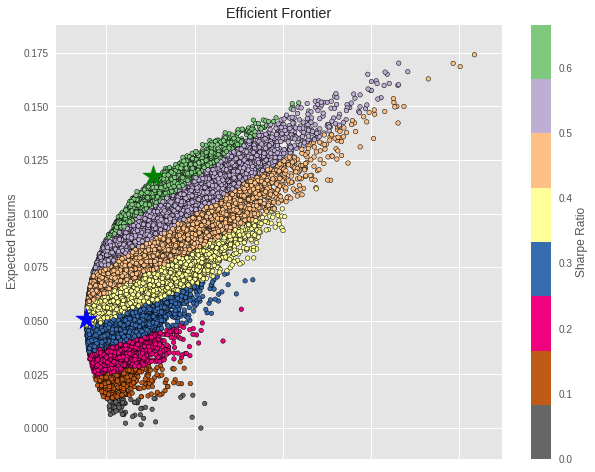

In [0]:
 #- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 
 #Plotting the two points on EFFICIENT FRONTIER 
  
sdp=df['Sharpe Ratio'].max()
sorted_sharpe=df.sort_values('Sharpe Ratio',ascending=False)
#print(sorted_sharpe.head())
x1=sorted_sharpe['Volatility'].iloc[0]
y1=sorted_sharpe['Returns'].iloc[0]

sdp_min=df['Volatility'].min()
sorted_volt=df.sort_values('Volatility')
x2=sorted_volt['Volatility'].iloc[0]
y2=sorted_volt['Returns'].iloc[0]

#print(x1,y1,x2,y2)

#print(sorted_volt.head())

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('ggplot')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='Accent_r', edgecolors='Black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.scatter(x1,y1,marker='*',color='g',s=500, label='Maximum Sharpe ratio')
plt.scatter(x2,y2,marker='*',color='b',s=500, label='Minimum volatility')
plt.show()

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - -# 

